## Описание эксперимента

Перед вами таблица, где числовая переменная – непрерывная. Задача – сравнить группы двумя способами: бутстрапом и u-тестом

Описание колонок
value – значения метрики
experimentVariant – Вариант теста (Control – контроль, Treatment – тест)
Задача
1. Сравните результат между тестом и контролем по двум кейсам:

Примените бутстрап (с np.mean) и критерий mann-whitney, а потом сравните p-value

Примените бутстрап (с np.median) и критерий mann-whitney, а потом сравните p-value.

2. Напишите выводы, которые можно сделать на основе анализа примененных критериев

In [53]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, mannwhitneyu
import seaborn as sns
from tqdm.auto import tqdm

plt.style.use('ggplot')

In [54]:
#импортириуем данные
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-inchenko-23/hw_bootstrap.csv', sep=';', decimal=',')
df

,Unnamed: 0,value,experimentVariant
0,1,10.380495,Control
1,2,9.546867,Control
2,3,11.088215,Control
3,4,10.147274,Control
4,5,9.789808,Control
...,...,...,...
995,996,1000.000000,Treatment
996,997,1200.000000,Treatment
997,998,1500.000000,Treatment
998,999,2000.000000,Treatment


In [55]:
df.groupby('experimentVariant').agg({'value':'mean'})

,value
experimentVariant,
Control,10.026867
Treatment,27.321499


In [56]:
df.groupby('experimentVariant').agg({'value':'median'})

,value
experimentVariant,
Control,10.018465
Treatment,10.025847


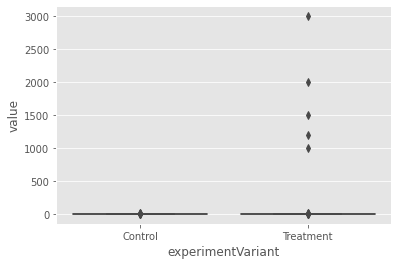

In [57]:
sns.boxplot(x='experimentVariant', y='value', data=df)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


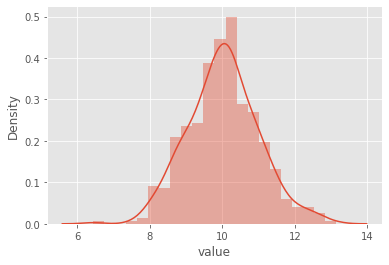

In [58]:
sns.distplot(df[df.experimentVariant == 'Control'].value)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


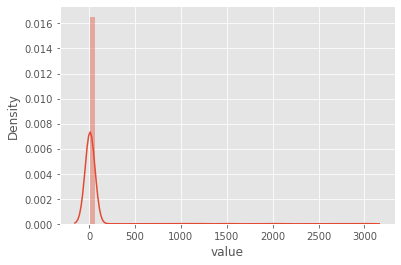

In [59]:
sns.distplot(df[df.experimentVariant == 'Treatment'].value)

In [81]:
# функция написана ментором
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(data_column_1, data_column_2, boot_it = 1000, statistic = np.mean, bootstrap_conf_level = 0.95):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in range(boot_it): # извлекаем подвыборки
        samples_1 = data_column_1.sample(boot_len, replace = True).values
        samples_2 = data_column_2.sample(boot_len, replace = True).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)      
        
    p_1 = norm.cdf(x = 0, loc = np.mean(boot_data), scale = np.std(boot_data))
    p_2 = norm.cdf(x = 0, loc = -np.mean(boot_data), scale = np.std(boot_data))
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    plt.style.use('ggplot')
    #plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()

    return {"p_value": p_value}

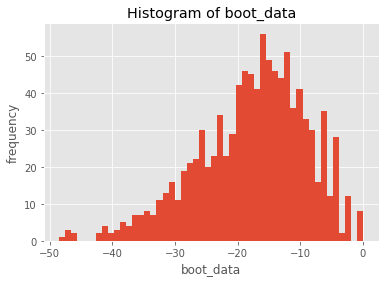

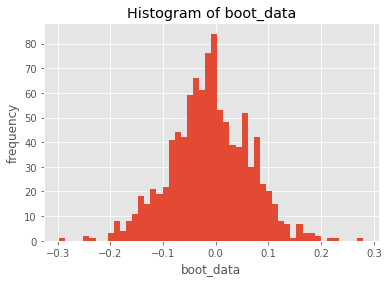

 Boot mean: 0.04330980043220325, Boot median: 0.8775852255450426, MW MannwhitneyuResult(statistic=124189.5, pvalue=0.8592148582485579)


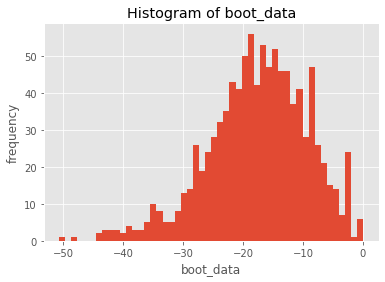

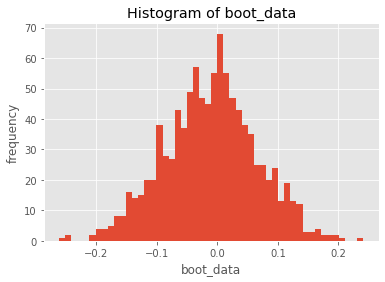

 Boot mean: 0.035250260408490164, Boot median: 0.882775531423245, MW MannwhitneyuResult(statistic=124189.5, pvalue=0.8592148582485579)


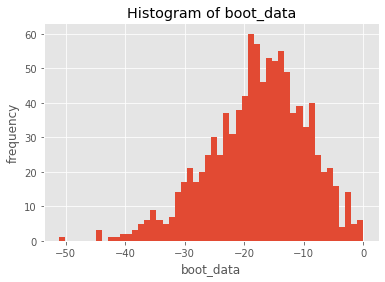

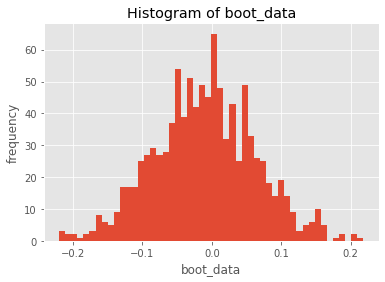

 Boot mean: 0.02990884553557988, Boot median: 0.8912443541336846, MW MannwhitneyuResult(statistic=124189.5, pvalue=0.8592148582485579)


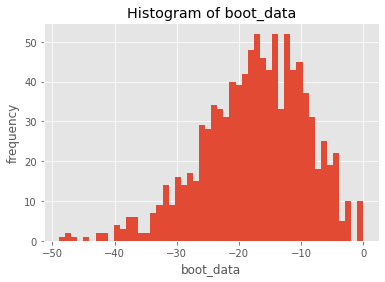

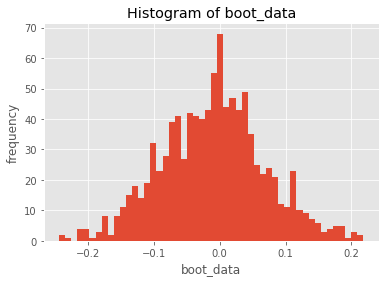

 Boot mean: 0.038345859876028135, Boot median: 0.8953959267641897, MW MannwhitneyuResult(statistic=124189.5, pvalue=0.8592148582485579)


In [83]:
x = df['value'][(df['experimentVariant'] == 'Control')]
y = df['value'][(df['experimentVariant'] == 'Treatment')]

res_mw=mannwhitneyu(x, y, alternative = 'two-sided')

for i in range(4):
    bootMean=get_bootstrap(x, y)
    bootMedian=get_bootstrap(x, y, statistic = np.median)
    print(f' Boot mean: {bootMean["p_value"]}, Boot median: {bootMedian["p_value"]}, MW {res_mw}')

### Вывод
Применяем Bootstrap, 
так как видим, что медианы не отличаются между собой по booststap, значения p_value  примерно такие же как и p_value по тесту Манна-Уитни. 
Про дисбаланс выборок: Boostrap учитывает это и нормирует размер выборок по верхней границе, чтобы при проверке гипотез мы смогли вычитать распределения друг из друга. Поэтому он является более релевантным оценщиком, так как сохраняется дисперсия из оригинальной выборки, в то время как у Манна-Уитни дисперсия не учитывается.